In [1]:
import pandas as pd
import json
import numpy as np


from imagedata_NeoroScan import medical_train, medical_test, display_img
from image_loading import * 
print("All Prerequisites Loaded Successfully")

Found 3157
Successfully loaded 3157
Found 3453
Successfully loaded 3453
Found 711
Successfully loaded 711
Found 1424
Successfully loaded 1424
Total Training Images: 8745
All Training Images Loaded Successfully!
Found 136
Successfully loaded 136
Found 140
Successfully loaded 140
Found 100
Successfully loaded 100
Found 136
Successfully loaded 136
Total Training Images: 8745
All Training Images Loaded Successfully!
Total Testing Images: 512
All Testing Images loaded successfully!
2.9.1+cpu
2.2.4
11.1.0
 13           RESUME                   0

 14           LOAD_GLOBAL              0 (img)
              LOAD_ATTR                2 (open)
              PUSH_NULL
              LOAD_FAST                0 (image_path)
              CALL                     1
              STORE_FAST               1 (image)

 15           LOAD_GLOBAL              4 (torch)
              LOAD_ATTR                6 (from_numpy)
              PUSH_NULL
              LOAD_GLOBAL              8 (np)
              LO

In [2]:
print("Medical Training Sets =",len(medical_train))
print("Medical Testing Sets =",len(medical_test))

Medical Training Sets = 4
Medical Testing Sets = 4


In [3]:
print("Structure of Training Images :")
str_training = structure_img(medical_train)

Structure of Training Images :
Type: <class 'list'>
Lenght: 4
  Type: <class 'list'>
  Lenght: 3157
    Type: <class 'PIL.Image.Image'>


In [4]:
print("Structure of Testing Images :")
str_testing = structure_img(medical_test)

Structure of Testing Images :
Type: <class 'list'>
Lenght: 4
  Type: <class 'list'>
  Lenght: 136
    Type: <class 'PIL.Image.Image'>


Training Images...


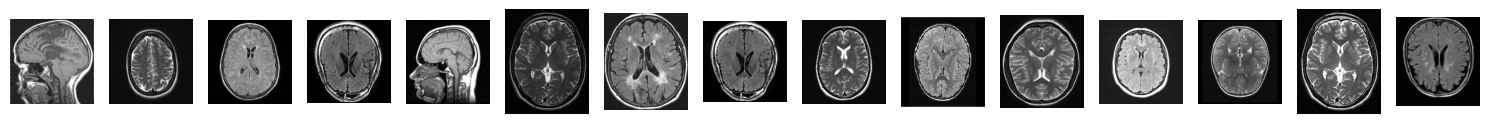

In [5]:
print("Training Images...")
train_image = display_img(medical_train, 0, 15)

Testing Images...


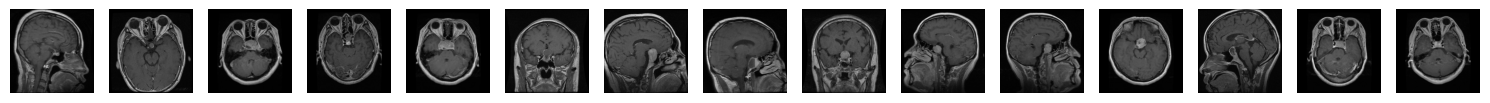

In [6]:
print("Testing Images...")
test_image = display_img(medical_test, 0, 15)


In [7]:
import torch, torchvision.transforms as T
from torchvision import models

model = models.resnet50(pretrained = True)
model = torch.nn.Sequential(*list(model.children()))[:-1]

C:\Users\Tanmay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Tanmay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
for img_var in medical_train:
    print("vectorising train set...")
    print("="*20)
    vector_train = []

    for img in img_var[:200]:
        
       
        prep = prep = T.Compose([T.Resize((256,256)), T.CenterCrop((224,224)),T.Grayscale(num_output_channels= 3), T.ToTensor()])
        tensor = prep(img).unsqueeze(0)

        vector_tr = model(tensor)

vectorising train set...
vectorising train set...
vectorising train set...
vectorising train set...


In [9]:
for img_var in medical_test:
    print("vectorising test set...")
    print("="*20)
    vector_test = []

    for img in img_var[:200]:
        prep = T.Compose([T.Resize((256,256)), T.CenterCrop((224,224)),T.Grayscale(num_output_channels= 3), T.ToTensor()])
        tensor = prep(img).unsqueeze(0)

        vector_ts = model(tensor)

vectorising test set...
vectorising test set...
vectorising test set...
vectorising test set...


In [10]:
print("Vectorized Training Set:", vector_tr, sep ="\n")
print(type(vector_tr))


Vectorized Training Set:
tensor([[[[0.3265]],

         [[0.5237]],

         [[0.4463]],

         ...,

         [[0.3179]],

         [[0.4874]],

         [[0.3135]]]], grad_fn=<MeanBackward1>)
<class 'torch.Tensor'>


In [11]:
print("Vectorized Testing Set:", vector_ts, sep="\n")
print(type(vector_ts))


Vectorized Testing Set:
tensor([[[[0.3917]],

         [[0.5261]],

         [[0.5262]],

         ...,

         [[0.3648]],

         [[0.4765]],

         [[0.3650]]]], grad_fn=<MeanBackward1>)
<class 'torch.Tensor'>


In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    n_estimators= 200,
    max_depth=10,
    verbose= 20
)
print("Random Forest Classiffier has been initiated =", rfc)

Random Forest Classiffier has been initiated = RandomForestClassifier(max_depth=10, n_estimators=200, verbose=20)


In [13]:
model.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [14]:
print("Vectorised Data's Type", sep="/n")
print(type(vector_tr), type(vector_ts))
print("Vectorised Data's Shape", sep="/n")
print("Training Value =",vector_tr.shape,"Testing Value =", vector_ts.shape )
print("Vectorised Data's Unsqueezed Shape ", sep="/n")
print("Training UnSqueezed =", vector_tr.unsqueeze(0).shape, "Testing Unsqueezed =", vector_ts.unsqueeze(0).shape)


Vectorised Data's Type
<class 'torch.Tensor'> <class 'torch.Tensor'>
Vectorised Data's Shape
Training Value = torch.Size([1, 2048, 1, 1]) Testing Value = torch.Size([1, 2048, 1, 1])
Vectorised Data's Unsqueezed Shape 
Training UnSqueezed = torch.Size([1, 1, 2048, 1, 1]) Testing Unsqueezed = torch.Size([1, 1, 2048, 1, 1])


In [15]:
print("Structure of Vector Train :")
str_training_v = structure_img(vector_tr)

print("Structure of Vector Testing :")
str_testing_v = structure_img(vector_ts)

Structure of Vector Train :
Type: <class 'torch.Tensor'>
Structure of Vector Testing :
Type: <class 'torch.Tensor'>


In [16]:
x_tr = (vector_tr.view(vector_tr.size(0), -1)).detach().cpu().numpy()
x_ts = (vector_ts.view(vector_ts.size(0), -1)).detach().cpu().numpy()

y_tr = torch.tensor([0] * x_tr.shape[0]).detach().cpu().numpy()
y_ts = torch.tensor([1] * x_tr.shape[0]).detach().cpu().numpy()

training_material = x_tr , x_ts, y_tr, y_ts
print(training_material)

(array([[0.32650167, 0.52365565, 0.44625306, ..., 0.31793007, 0.48742867,
        0.31350648]], shape=(1, 2048), dtype=float32), array([[0.39173007, 0.52608824, 0.52620727, ..., 0.3647975 , 0.47649312,
        0.36498925]], shape=(1, 2048), dtype=float32), array([0]), array([1]))


In [ ]:
y_tr = torch.as_tensor(y_tr)
y_ts = torch.as_tensor(y_ts)

y = torch.cat([y_tr,y_ts],dim = 0)
y = y.detach().cpu().numpy()



array([0, 1])

In [29]:
print("X_train:", x_tr)
print("x_test:",x_ts)
print("y_train:",y_tr)
print("y_test:",y_ts)

X_train: [[0.32650167 0.52365565 0.44625306 ... 0.31793007 0.48742867 0.31350648]]
x_test: [[0.39173007 0.52608824 0.52620727 ... 0.3647975  0.47649312 0.36498925]]
y_train: tensor([0])
y_test: tensor([1])


In [30]:
print("="*20)
print("Model Training ...")
print("="*20)
rfc.fit(x_tr, y_tr)


Model Training ...
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74

[Parallel(n_jobs=1)]: Done  93 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  94 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  95 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  96 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  99 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 101 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 102 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 103 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 104 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 105 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 106 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 107 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 108 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200


[Parallel(n_jobs=1)]: Done 138 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 139 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 140 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 141 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 142 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 143 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 144 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 145 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 146 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 147 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 148 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 149 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 150 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 151 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 152 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 153 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Do

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
y_pred = rfc.predict(x_ts)
print("Y_prediction :", y_pred)


Y_prediction : [0]


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

In [33]:
from sklearn.metrics import accuracy_score, precision_score , f1_score, recall_score

accuracy = accuracy_score(y_pred, y_ts)
precision = precision_score(y_pred, y_ts)
f_1 = f1_score(y_pred, y_ts)
recall = recall_score(y_pred, y_ts)




C:\Users\Tanmay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
